##  Image Processing for Microscopic Images

In [1]:
# This is used to autoreload updates made in python files during development
%load_ext autoreload
%autoreload 2

In [2]:
from co_mof import load_rgb_image, grayscale_image, apply_rc_thresholding

# TODO: use config
# TODO: use script to pull in dataset

image_path = 'examples/images/EXP1_EVOS_20X_031.tif'

# Load and preprocess the image
image = load_rgb_image(image_path)
image_gray = grayscale_image(image)

# Apply RC thresholding
rc_thresh, rc_mask = apply_rc_thresholding(image_gray)

## Finding the Area of MOFs Using the Scale Bar
We will use the scale bar to determine the distance per pixel of the image 

To do this we will use OCR and contour detection to determine the following:
* Pixel length of the scale bar
* Number of units the bar represents
* The units of the bar

This is done using the `ScaleBarDetector` class from `co_mof_ocr.py`

In [3]:
from co_mof_ocr import ScaleBarDetector

Instantiating the `ScaleBarDetector` class with our image path will estimate the physical and digital attributes of the image. Of most importance are:
* `ScaleBarDetector.units_per_pixel`: a float that is the number of physical units per pixel in the image
* `ScaleBarDetector.units`: is a string that represents the units of the scale bar (such as um)

In [4]:
scale_bar = ScaleBarDetector(image_path)

There is also a `ScaleBarDetector.debug_display()` function to visualize the results in case the results are unexpected

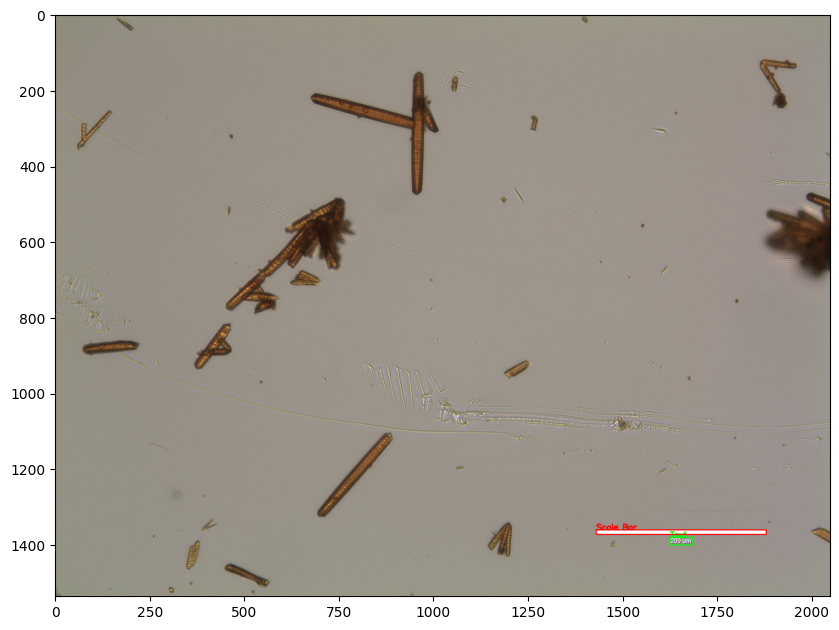

In [5]:
scale_bar.debug_display()

In [ ]:
from co_mof import detect_horizontal_lines, combine_close_lines, overlay_horizontal_lines, display_overlay
from skimage import measure
import numpy as np


# # TODO: can be deprecated if we use OCR

# # Detect all contours in the binary image using skimage
# contours = measure.find_contours(rc_mask, level=0.8)

# # Detect horizontal lines in contours
# horizontal_lines = detect_horizontal_lines(contours)

# # Combine horizontal lines that are close to each other
# combined_lines = combine_close_lines(horizontal_lines, pixel_tolerance=5)

# # Overlay combined horizontal lines on the binary image and highlight the longest in red
# overlay_image, longest_line = overlay_horizontal_lines(rc_mask, combined_lines)

# # Display the overlay
# display_overlay(overlay_image)

# # Assuming the actual length of the longest line is 200 micrometers  # TODO: Why 200?
# actual_length_micrometers = 200

# # Print details of the longest line  # TODO: should be in function
# if longest_line:
#     x1, y1, x2, y2 = longest_line
#     length_in_pixels = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
#     length_per_pixel = actual_length_micrometers / length_in_pixels
#     print(f"Length of the longest line in pixels: {length_in_pixels:.2f}")
#     print(f"Actual length per pixel: {length_per_pixel:.4f} micrometers per pixel")
    
# else:
#     print("No horizontal lines detected.")
#     length_in_pixels = 450
#     length_per_pixel = actual_length_micrometers / length_in_pixels

In [7]:
print(f'Using OCR: {scale_bar.units_per_pixel:.4f} {scale_bar.units} per pixel')
length_per_pixel = scale_bar.units_per_pixel

Using OCR: 0.4454 um per pixel


## RC Thresholding and Morphological Closing

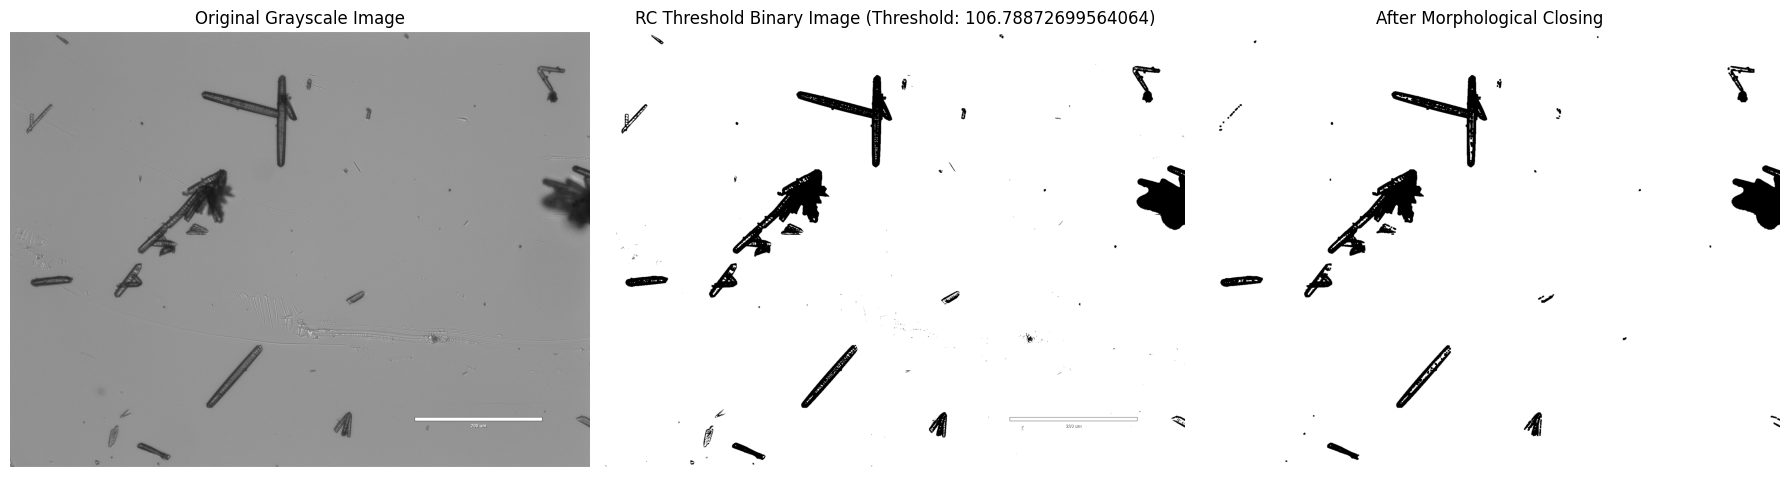

In [8]:
from co_mof import apply_morphological_closing, display_rc_closing_results

# Apply RC thresholding
# rc_thresh, bin_rc = apply_rc_thresholding(image_gray)  # TODO: already did this in cell 1?

# Apply morphological closing on the RC thresholded binary image
closed_image = apply_morphological_closing(rc_mask)

# Display results before and after morphological closing
display_rc_closing_results(image_gray, rc_thresh, rc_mask, closed_image)

## Contour Detection and Filtering for White Regions

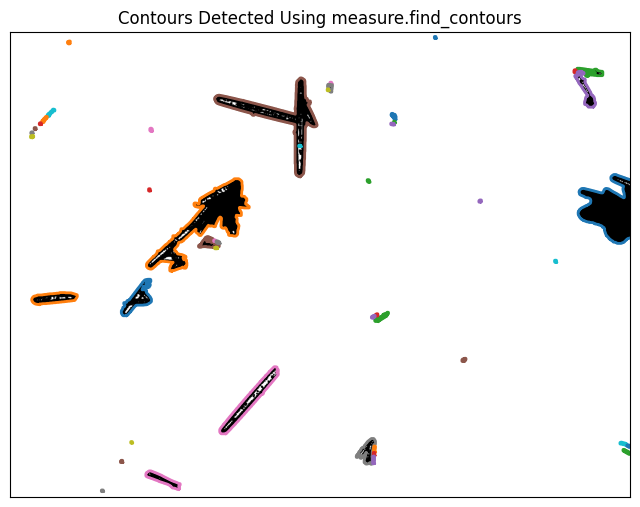

In [9]:
from co_mof import is_contour_enclosing_white_region, normalize_and_find_contours, filter_and_remove_white_region_contours, display_contours

# Example usage:
# Normalize the closing image and find contours
contours = normalize_and_find_contours(closed_image, contour_level=0.8)

# Filter out contours that enclose white regions
contours = filter_and_remove_white_region_contours(closed_image, contours)

# Display the contours on the closing result
display_contours(closed_image, contours)

## Displaying Contours on the Original Color Image

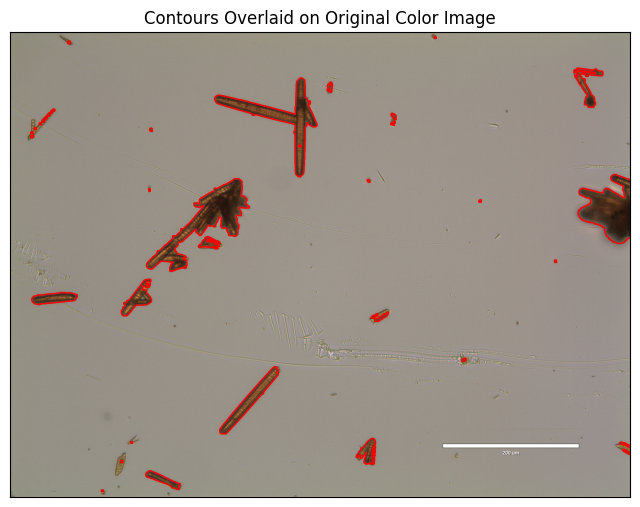

In [10]:
from co_mof import display_contours_on_original_color

# Display the contours overlaid on the original color image
display_contours_on_original_color(image, contours)

## Contour Classification by Convexity and Boundary Detection

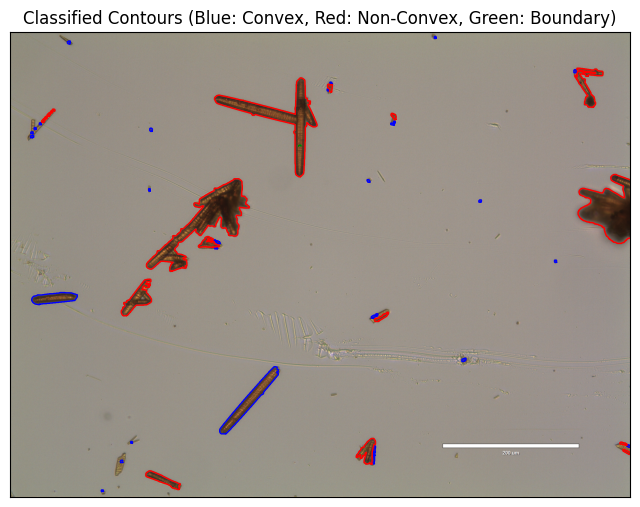

In [11]:
from co_mof import classify_contours_by_convexity, display_classified_contours_on_original_color

# Example usage:
# Classify contours based on convexity and identify boundary contours
blue_contours, red_contours, boundary_contours = classify_contours_by_convexity(image_gray.shape, contours)

# Display the contours overlaid on the original color image, classified by convexity and boundary
display_classified_contours_on_original_color(image, blue_contours, red_contours, boundary_contours)

# Activated IFF less than 2 Detected Contours

## Overlaying Minimum Bounding Boxes and Calculating Aspect Ratios and Areas 

In [12]:
from co_mof import process_and_overlay_if_few_contours  # TODO: this looks like it should be broken up into filter & show fxns

# Example Usage:
# Assuming `original_image`, `blue_contours`, `red_contours`, and `boundary_contours` are defined
blue_aspect_ratios, blue_areas = process_and_overlay_if_few_contours(
    image, blue_contours, red_contours, boundary_contours, length_per_pixel
)

# Output aspect ratios and areas
print("All Aspect Ratios:", blue_aspect_ratios)
print("All Areas:", blue_areas)

Total contours (48) are sufficient. Skipping bounding box overlay.
All Aspect Ratios: []
All Areas: []


# Else (If more than 2 detected contours)

## Processing Blue Contours: Areas and Aspect Ratios

Total areas: 31, Total aspect ratios: 31


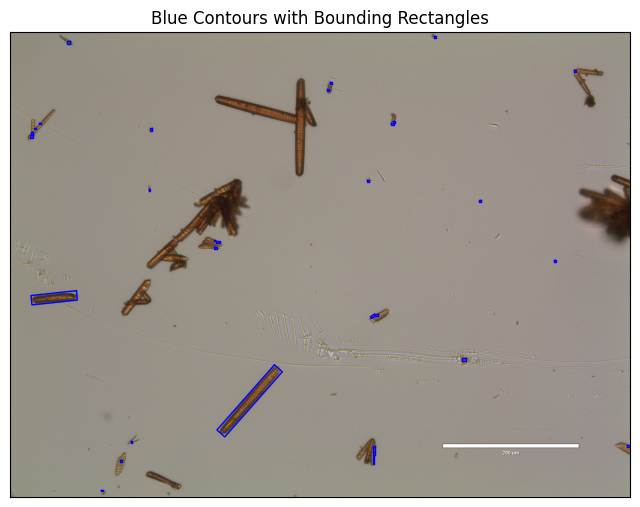

In [13]:
from co_mof import process_blue_contours  # TODO: vague function name
blue_areas, blue_aspect_ratios = process_blue_contours(image_gray, image, blue_contours)

## Plotting Histograms with KDE Curves, Peaks, and Standard Deviation

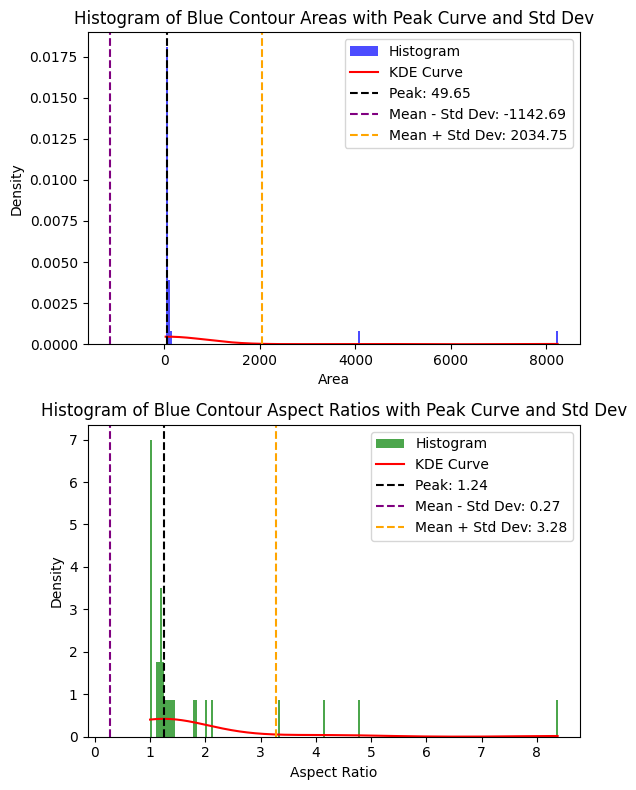

Peak Area: 49.648648648648646
Mean Area: 446.03225806451616, Std Dev Area: 1588.722726653466
Peak Aspect Ratio: 1.243628993192652
Mean Aspect Ratio: 1.77696806040319, Std Dev Aspect Ratio: 1.5038553884915464


In [14]:
from co_mof import plot_top_bottom_histograms_with_peak_curve_and_std
# Example usage:
peak_area, peak_ar, mean_area, std_area, mean_ar, std_ar = plot_top_bottom_histograms_with_peak_curve_and_std(blue_areas, blue_aspect_ratios)

# Print the peaks and standard deviations  # TODO: should be in function
print(f"Peak Area: {peak_area}")
print(f"Mean Area: {mean_area}, Std Dev Area: {std_area}")
print(f"Peak Aspect Ratio: {peak_ar}")
print(f"Mean Aspect Ratio: {mean_ar}, Std Dev Aspect Ratio: {std_ar}")

## Filtering and Overlaying Contours with Area Limits

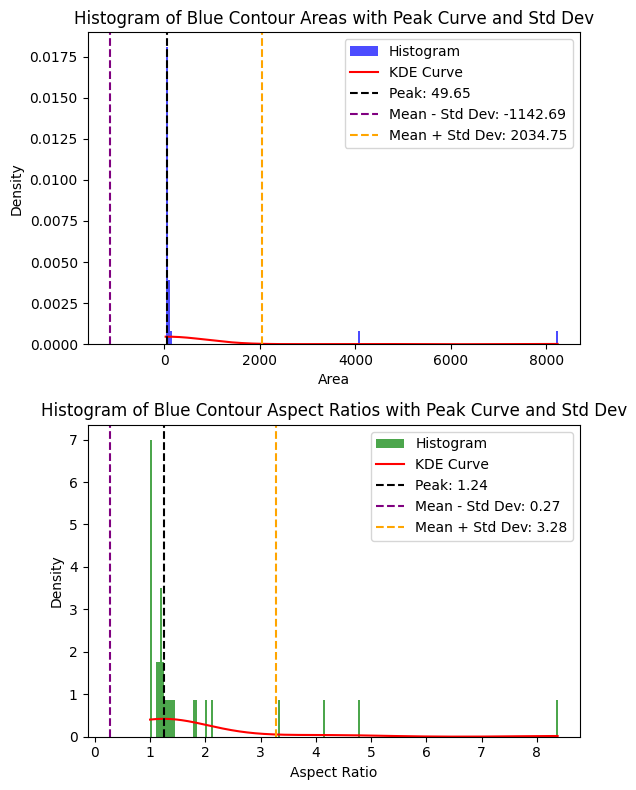

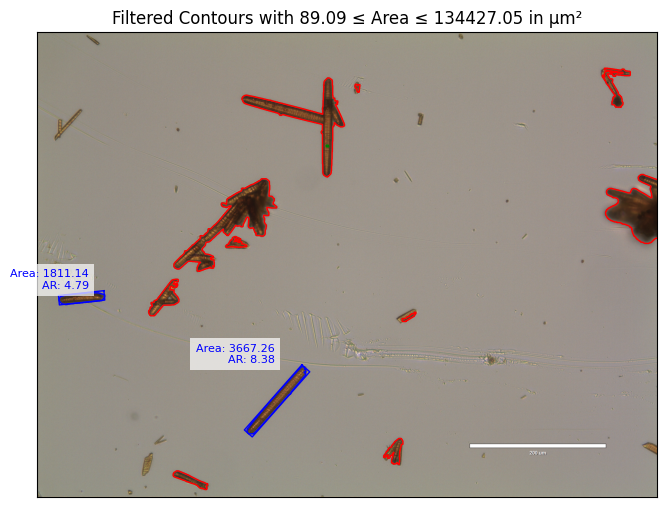

Number of Filtered Blue Contours: 2
Number of Red contours: 11
Number of Green contours: 1
Filtered Blue Contour Areas:
Contour 1: Area = 1811.1358574610247
Contour 2: Area = 3667.260579064588


In [15]:
from co_mof import filter_and_overlay_all_contours_with_upper_limit

# Example usage:
# Assuming `areas`, `original_image`, `image_gray`, `blue_contours`, `red_contours`, and `green_contours` are defined
peak_area, _, mean_area, std_dev_area, mean_ar, _ = plot_top_bottom_histograms_with_peak_curve_and_std(
    blue_areas, blue_aspect_ratios
)

# TODO: put below in function
# Replacement of Value (To ensure most contours are detected)
if mean_area > 5000:
    mean_area = 500
            
elif mean_area < 1000:
    mean_area = 200

filtered_blue_contours, blue_contour_areas, filtered_red_contours, filtered_green_contours, blue_aspect_ratios = filter_and_overlay_all_contours_with_upper_limit(
    image, image_gray, blue_contours, red_contours, boundary_contours, mean_area, std_dev_area, peak_area, length_per_pixel
)

print(f"Number of Filtered Blue Contours: {len(filtered_blue_contours)}")
print(f"Number of Red contours: {len(filtered_red_contours)}")
print(f"Number of Green contours: {len(filtered_green_contours)}")

actual_blue_contour_areas = []

# Print the areas of filtered blue contours
print("Filtered Blue Contour Areas:")
for idx, blue_contour_area in enumerate(blue_contour_areas):
    blue_contour_area = blue_contour_area * length_per_pixel
    actual_blue_contour_areas.append(blue_contour_area)
    print(f"Contour {idx + 1}: Area = {blue_contour_area}")

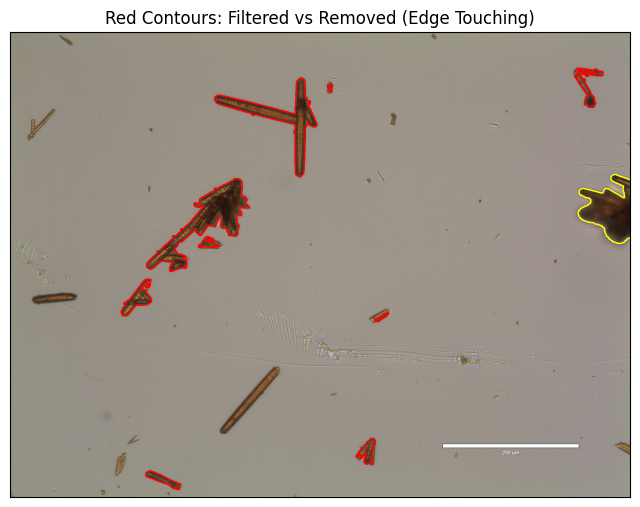

In [16]:
from co_mof import remove_edge_touching_contours_and_display

# Remove and display red contours that touch the edges before filtering
filtered2_red_contours = remove_edge_touching_contours_and_display(filtered_red_contours, image_gray, image, color="red")

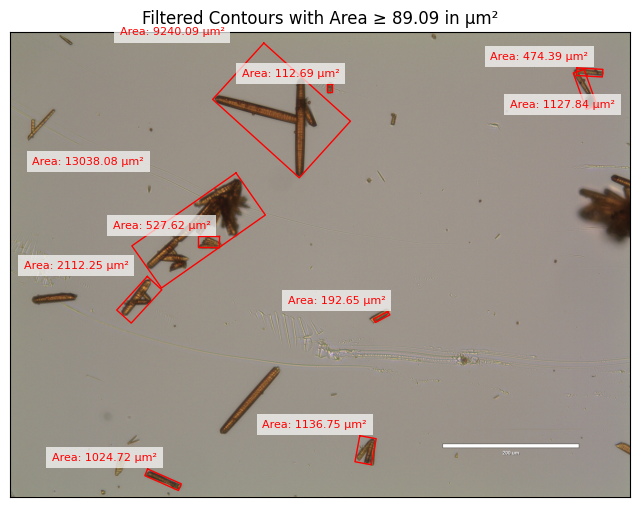

Actual Contour Areas for Filtered Red Contours:
Contour 1: Area = 474.39 µm²
Contour 2: Area = 1127.84 µm²
Contour 3: Area = 9240.09 µm²
Contour 4: Area = 112.69 µm²
Contour 5: Area = 13038.08 µm²
Contour 6: Area = 527.62 µm²
Contour 7: Area = 2112.25 µm²
Contour 8: Area = 192.65 µm²
Contour 9: Area = 1136.75 µm²
Contour 10: Area = 1024.72 µm²


In [17]:
from co_mof import plot_bounding_boxes_and_calculate_contour_area

red_contour_areas = plot_bounding_boxes_and_calculate_contour_area(
    filtered2_red_contours, image, mean_area, length_per_pixel, color="red"
)

# Print the calculated contour areas
print("Actual Contour Areas for Filtered Red Contours:")
for idx, area in enumerate(red_contour_areas):
    print(f"Contour {idx + 1}: Area = {area:.2f} µm²")

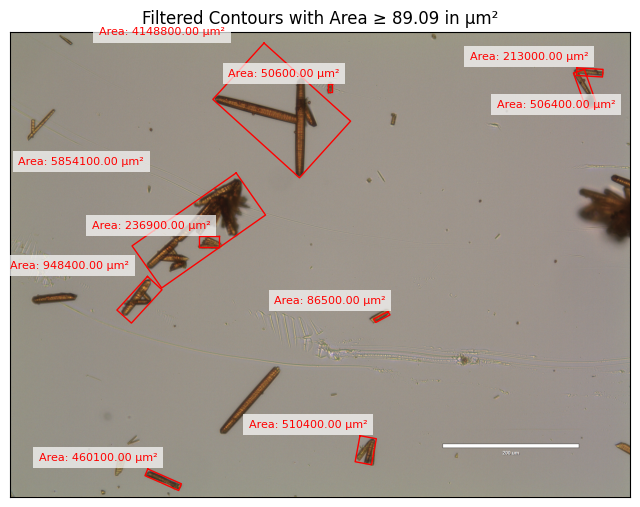

Actual Contour Areas for Filtered Red Contours:
Contour 1: Area = 213000.00 µm²
Contour 2: Area = 506400.00 µm²
Contour 3: Area = 4148800.00 µm²
Contour 4: Area = 50600.00 µm²
Contour 5: Area = 5854100.00 µm²
Contour 6: Area = 236900.00 µm²
Contour 7: Area = 948400.00 µm²
Contour 8: Area = 86500.00 µm²
Contour 9: Area = 510400.00 µm²
Contour 10: Area = 460100.00 µm²


In [18]:
from co_mof import plot_bounding_boxes_and_display_contour_areas

red_contour_areas = plot_bounding_boxes_and_calculate_contour_area(  # TODO: is this the correct function?
    filtered2_red_contours, image, length_per_pixel, mean_area, color="red"
)

# Print the calculated contour areas
print("Actual Contour Areas for Filtered Red Contours:")
for idx, area in enumerate(red_contour_areas):
    print(f"Contour {idx + 1}: Area = {area:.2f} µm²")

## Data Analysis

In [19]:
from co_mof import create_summary_table

# Example Data
# Generate the summary table
summary_table = create_summary_table(
    blue_aspect_ratios, 
    actual_blue_contour_areas, red_contour_areas
)

# Display the summary table
display(summary_table)

Category  Count Mean Aspect Ratio  Mean Area (µm²)
0  Single Crystals      2              6.58           2739.2
1         Clusters     10                 -        1301520.0

In [20]:
# TODO: confused about this - it is a duplicate function and uses styling that requires extra dependencies

# import pandas as pd
# from IPython.display import display

# def create_summary_table(
#     aspect_ratios_single,
#     areas_single, areas_clusters
# ):
#     """
#     Create a summary table with the count of contours, mean aspect ratios, and mean areas for single crystals,
#     overlapping crystals, and clusters.

#     Parameters:
#     - single_crystals: List of single crystals.
#     - overlapping_crystals: List of overlapping crystals.
#     - clusters: List of clusters.
#     - aspect_ratios_single: List of aspect ratios for single crystals.
#     - aspect_ratios_overlapping: List of aspect ratios for overlapping crystals.
#     - aspect_ratios_clusters: List of aspect ratios for clusters.
#     - areas_single: List of areas for single crystals.
#     - areas_overlapping: List of areas for overlapping crystals.
#     - areas_clusters: List of areas for clusters.

#     Returns:
#     - summary_table: Pandas DataFrame containing the summary.
#     """
#     # Calculate counts
#     count_single_crystals = len(aspect_ratios_single)
#     count_clusters = len(areas_clusters)

#     # Calculate mean aspect ratios
#     mean_ar_single = round(np.mean(aspect_ratios_single), 2) if aspect_ratios_single else 0
#     mean_ar_clusters = "-"

#     # Calculate mean areas
#     mean_area_single = round(np.mean(areas_single), 2) if areas_single else 0
#     mean_area_clusters = round(np.mean(areas_clusters), 2) if areas_clusters else 0

#     # Calculate totals
#     total_count = count_single_crystals 
#     total_aspect_ratios = aspect_ratios_single 
#     total_mean_ar = round(np.mean(total_aspect_ratios), 2) if total_aspect_ratios else 0


#     # Create the summary table
#     summary_table = pd.DataFrame({
#         "Category": ["Single Crystals", "Overlapping Crystals", "Total", "Clusters"],
#         "Count": [count_single_crystals, count_clusters],
#         "Mean Aspect Ratio": [mean_ar_single,   mean_ar_clusters],
#         "Mean Area (µm²)": [mean_area_single, mean_area_clusters]
#     })

#     return summary_table

# # Example Data
# # Generate the summary table

# # Format specific columns to 2 decimal points
# summary_table["Mean Aspect Ratio"] = summary_table["Mean Aspect Ratio"].apply(
#     lambda x: f"{float(x):.2f}" if isinstance(x, (int, float)) else x
# )
# summary_table["Mean Area (µm²)"] = summary_table["Mean Area (µm²)"].apply(
#     lambda x: f"{float(x):.2f}" if isinstance(x, (int, float)) else x
# )

# # Display the summary table with Arial font styling and centering
# styled_table = summary_table.style.set_table_styles([
#     {'selector': 'th', 'props': [('font-family', 'Arial'), ('font-size', '12px'), ('text-align', 'center')]},
#     {'selector': 'td', 'props': [('font-family', 'Arial'), ('font-size', '12px'), ('text-align', 'center')]},
#     {'selector': 'table', 'props': [('margin-left', 'auto'), ('margin-right', 'auto')]}  # Center the table
# ])
# display(styled_table)

In [21]:
from co_mof import calculate_summary_with_std

# Calculate summary table with standard deviations
summary_table_with_std = calculate_summary_with_std(
    blue_aspect_ratios,
    actual_blue_contour_areas, red_contour_areas
)

# Ensure the plot displays the categories in the correct order
correct_order = ["Single Crystals", "Clusters"]
summary_table_with_std = summary_table_with_std.iloc[::-1].reset_index(drop=True)

# Update category labels to have one word per line
summary_table_with_std["Category"] = summary_table_with_std["Category"].replace({
    "Single Crystals": "Single\nCrystals",
    "Clusters": "Clusters"
})

# # Define bar width
# bar_width = 0.5  # Adjust this value for the desired bar width

# # Plot horizontal bar plot for counts
# plt.figure(figsize=(5, 4))
# plt.barh(summary_table_with_std["Category"], summary_table_with_std["Count"], color='dodgerblue', height=bar_width)
# plt.xlabel("Count", fontsize=14)
# # plt.ylabel("Category", fontsize=14)
# # plt.title("Counts of Crystals and Clusters", fontsize=16)
# plt.grid(axis='x', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

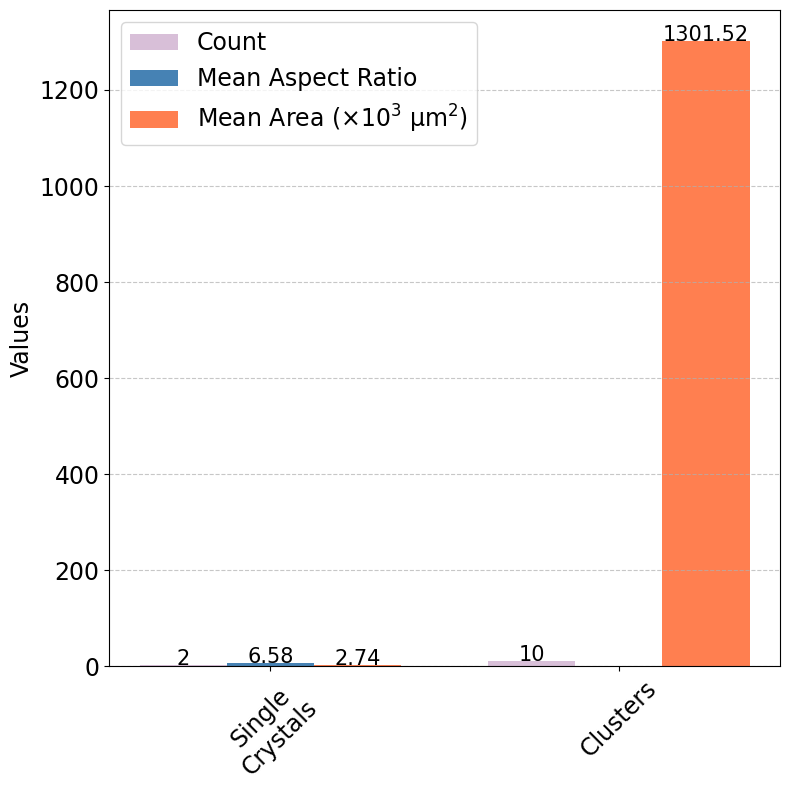

In [22]:
# TODO: should be in a function
from matplotlib import pyplot as plt

# Extract data from the summary table
categories = summary_table_with_std["Category"][::-1]
counts = summary_table_with_std["Count"][::-1]
mean_aspect_ratios = summary_table_with_std["Mean Aspect Ratio"][::-1]
mean_areas = summary_table_with_std["Mean Area (µm²)"][::-1]

# Define bar positions and width
bar_width = 0.25
indices = np.arange(len(categories))

# Convert Mean Aspect Ratio and Mean Area to floats, handling non-numeric values like "-"
mean_aspect_ratios = [float(val) if val != "-" else 0 for val in mean_aspect_ratios]
mean_areas = [float(val) if val != "-" else 0 for val in mean_areas]

# Normalize Mean Area for better visualization alongside Count and Aspect Ratio
area_scaling_factor = 1e3  # Adjust this for better scaling
mean_areas_scaled = [area / area_scaling_factor for area in mean_areas]

# Plot grouped vertical bar chart
fig, ax = plt.subplots(figsize=(8, 8))

# Add bars for Count
bars_count = plt.bar(indices - bar_width, counts, width=bar_width, color='thistle', label='Count')

# Add bars for Mean Aspect Ratio
bars_aspect = plt.bar(indices, mean_aspect_ratios, width=bar_width, color='steelblue', label='Mean Aspect Ratio')

# Add bars for Mean Area (scaled)
bars_area = plt.bar(indices + bar_width, mean_areas_scaled, width=bar_width, color='coral', label=r"Mean Area ($\times10^3$ µm$^2$)")


for bars, data in zip([bars_count, bars_aspect, bars_area], [counts, mean_aspect_ratios, mean_areas_scaled]):
    for scale_bar, value in zip(bars, data):
        if value != 0:  # Ignore labels for bars with a value of 0
            plt.text(
                scale_bar.get_x() + scale_bar.get_width() / 2,  # Center the text horizontally on the bar
                scale_bar.get_height() + 0.05,  # Position slightly above the bar
                f"{value:.2f}" if isinstance(value, float) else f"{int(value)}",  # Format the text
                ha='center', fontsize=15
            )

# Add labels and legend
plt.ylabel("Values", fontsize=17)
plt.xticks(indices, categories, fontsize=17, rotation=45)
plt.yticks(fontsize=17)
plt.legend(fontsize=17, loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a title
# plt.title("Counts, Aspect Ratios, and Areas by Category", fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()